In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML datasets/ml-latest-small'
%ls

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML datasets/ml-latest-small
ceo1.png  complete_correlation.png  filename.png  movies.csv   README.txt
ceo.png   correlation.png           links.csv     ratings.csv  tags.csv


In [2]:
#install packages
!pip install dython
%pip install mlxtend --upgrade
!pip install anytree

#importing libraries
from anytree import Node, RenderTree
from anytree.exporter import DotExporter
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
from mlxtend.frequent_patterns import fpmax
import itertools

#Question 1

In [3]:
#reading data
data_links = pd.read_csv("links.csv") 
data_movies = pd.read_csv("movies.csv") 
data_ratings = pd.read_csv("ratings.csv") 
data_tags = pd.read_csv("tags.csv") 


 Exploratory data analysis (EDA) of movies.csv 

Introductory details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


Statistical insight: 
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000 

Number of Nan values per column:
movieId    0
title      0
genres     0
dtype: int64 

Correlation Heatmap:


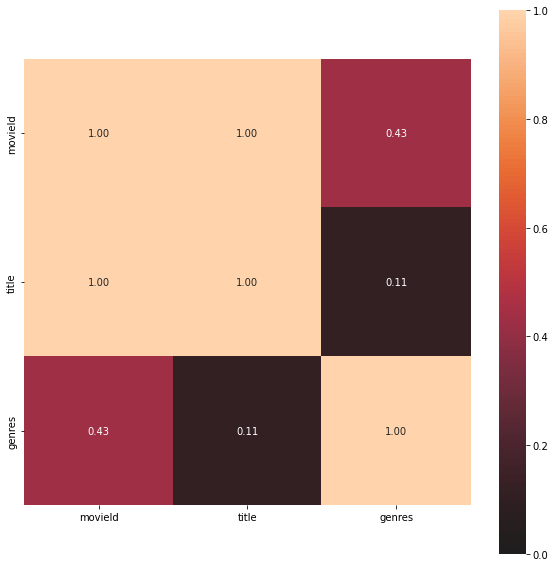



Finding frequently occurring values in categorical features :
5 most frequently occurring values in  title : 
Eros (2004)                               2
Saturn 3 (1980)                           2
Confessions of a Dangerous Mind (2002)    2
War of the Worlds (2005)                  2
Emma (1996)                               2
Name: title, dtype: int64 

5 most frequently occurring values in  genres : 
Drama             1053
Comedy             946
Comedy|Drama       435
Comedy|Romance     363
Drama|Romance      349
Name: genres, dtype: int64 


 Exploratory data analysis (EDA) of ratings.csv 

Introductory details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1

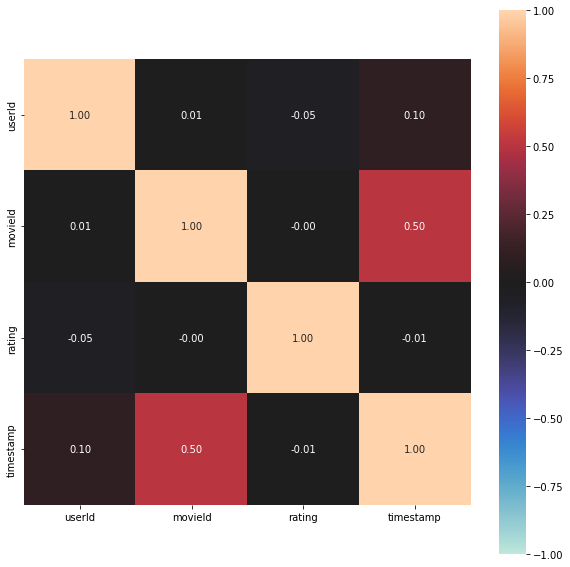



Finding frequently occurring values in categorical features :

 Exploratory data analysis (EDA) of tags.csv 

Introductory details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


Statistical insight: 
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09 

Number of 

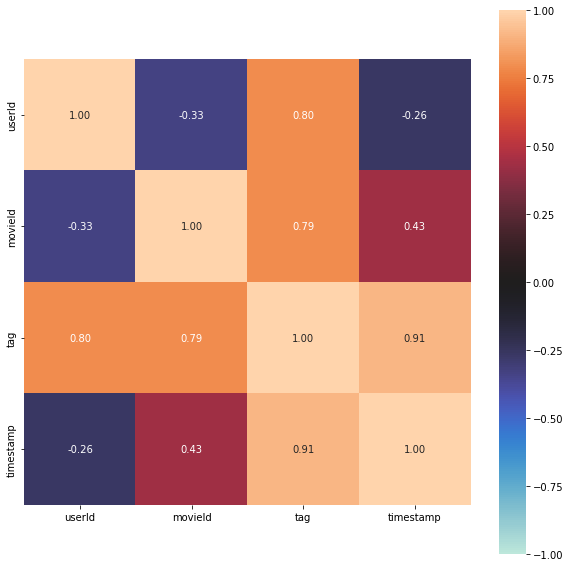



Finding frequently occurring values in categorical features :
5 most frequently occurring values in  tag : 
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
surreal               23
Name: tag, dtype: int64 


 Exploratory data analysis (EDA) of links.csv 

Introductory details: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
None


Statistical insight: 
             movieId        imdbId         tmdbId
count    9742.000000  9.742000e+03    9734.000000
mean    42200.353623  6.771839e+05   55162.123793
std     52160.494854  1.107228e+06   93653.481487
min         1.000000  4.170000e+02       2.000000
25%      3248.250000  9.518075e+04    96

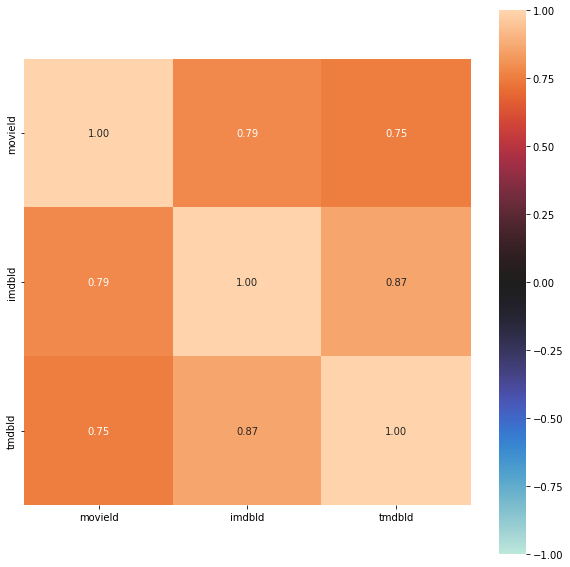



Finding frequently occurring values in categorical features :


In [4]:
#Exploratory data analysis (EDA)

def analysis(data):
  #Introductory details about data
  print("Introductory details: ")
  print(data.info())
  print("\n")

  #Statistical Insight:
  print("Statistical insight: ")
  print(data.describe(), "\n")

  #Finding Number of Nan values per column
  print("Number of Nan values per column:")
  print(data.isnull().sum(), "\n")

  #Plot Correlation Heatmap for all features
  print("Correlation Heatmap:")
  complete_correlation= associations(data, filename= 'correlation.png', figsize=(10,10))
  print("\n")

  #finding frequently occurring values in categorical features,
  print("Finding frequently occurring values in categorical features :")
  categorical_features=identify_nominal_columns(data)
  for x in categorical_features:
    print("5 most frequently occurring values in ", x, ": ")
    print(data[x].value_counts().head(), "\n")


#Exploratory data analysis (EDA) of all 4 datasets
print("\n Exploratory data analysis (EDA) of movies.csv \n")
analysis(data_movies)
print("\n Exploratory data analysis (EDA) of ratings.csv \n")
analysis(data_ratings)
print("\n Exploratory data analysis (EDA) of tags.csv \n")
analysis(data_tags)
print("\n Exploratory data analysis (EDA) of links.csv \n")
analysis(data_links)


#Question 2

#Data preprocessing

In [5]:
#merging data_ratings and data_movies 
data = data_movies.merge(data_ratings, on = 'movieId',how = 'inner')
print(len(data.userId.unique())," users")

610  users


In [6]:
def preprocessing(data_given):
  #dropping unnecessary columns
  data_given= data_given.drop('rating',axis=1)
  data_given= data_given.drop('timestamp',axis=1)
  data_given= data_given.drop('genres',axis=1)

  #preprocessing the dataset to create a transactional list in which every row represent a user and their selected movies
  data_list = data_given.groupby(by = ["userId"])["title"].apply(list)
  data_list = data_list.reset_index()
  data_list = data_list["title"].tolist()
  #print(len(data_list))

  #data is converted into binary using transactionEncoder
  encoding = TransactionEncoder()
  encoded_data = encoding.fit(data_list).transform(data_list)
  train = pd.DataFrame(encoded_data, columns=encoding.columns_)
  return train

#preprocessing data
train = preprocessing(data)
print(train.shape)

(610, 9719)


#Generating frequent itemsets

In [7]:
#Fpgrowth metric
fpgrowth_itemsets = fpgrowth(train, min_support=0.092, use_colnames=True)
fpgrowth_itemsets['itemsets'].apply(lambda x: len(x)).value_counts()

5     75511
4     68573
6     47359
3     32217
7     17309
2      6391
8      3650
9       391
1       373
10       18
Name: itemsets, dtype: int64

#Applying Association Rules

In [8]:
#Applying Association Rules using metric="lift" and threshold=1
model = association_rules(fpgrowth_itemsets,metric="lift",min_threshold=1)
#including a column for length of movies in antecedents column
model['length'] = model["antecedents"].apply(lambda x: len(x))
#dropping unnecessary columns
model = model.drop(["antecedent support","consequent support", "leverage", "conviction"], axis=1)
print(model.shape)

(9693512, 6)


In [9]:
model['antecedents'][4]

frozenset({'Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)'})

In [10]:
#Function to return list of K recommended movies based on a gievn movie_set
#K = no of movies to be recommended 
data_movies_copy = data_movies.copy(deep=True)

#Function to Recommend movies using association Rules:
def recommend(movie_set, K):
  recommended_movies_list=[]
  #rules only with given length
  result= model[model["length"].apply(lambda x: len(movie_set)==x)]
  #rules only containing given movies
  for movie in movie_set:
    result= result[result["antecedents"].apply(lambda x: movie in str(x))]
  #sort rules by lift

  if(len(result)!=0):
    result = result.sort_values(ascending=False,by='lift')
    result= result.reset_index()
    for index, row in result.iterrows():
      #print(row["consequents"])
      for movie in row["consequents"]:
        if recommended_movies_list.count(movie)==0: #to avoid recommending duplicate movies
          recommended_movies_list.append(str(movie))
        if len(recommended_movies_list)== K:
          break
      if len(recommended_movies_list)== K:
          break

  if len(recommended_movies_list)<K :
    rec_genre= recommend_by_genre(movie_set.pop())
    if len(rec_genre)==0:
      return recommended_movies_list
    for index, row in rec_genre.iterrows():
      if recommended_movies_list.count(str(row['title']))==0 and (str(row['title']) not in movie_set): #to avoid recommending duplicate movies
        recommended_movies_list.append(str(row['title']))
      if len(recommended_movies_list)== K:
        break

  return recommended_movies_list


#Function to recommend genres if association rules give 0 recommendations
def recommend_by_genre(movie_name):
  da = data_movies_copy.merge(data_ratings, on = 'movieId',how = 'inner')
  da.drop(columns=['userId','timestamp','movieId'],inplace=True)
  da = da.sort_values(ascending=False,by='rating')
  da.drop_duplicates(subset ="title", keep = 'first', inplace = True)
  temp = pd.DataFrame(columns = ['title','genres','rating'])
  for index, row in da.iterrows():
    gen = row['genres']
    final = set(map(str, gen.split('|')))
    da['genres'][index] = final
  row = da[da['title'] == movie_name]
  movie_genre = row['genres'].values
  movie_genre= movie_genre[0]
  for index, row in da.iterrows():
    s = row['genres']
    if s.issubset(movie_genre):
      temp = temp.append({'title' : da['title'][index] , 'genres' : da['genres'][index], 'rating' : da['rating'][index]}, ignore_index = True)
  temp['length'] = temp['genres'].apply(lambda x: len(x))
  temp = temp.sort_values(ascending=False,by=['rating','length'])
  temp.drop(temp.index[temp['title'] == movie_name], inplace=True)
  temp= temp.reset_index()
  return temp

In [11]:
#recommending movies 
movie_set= {"Forrest Gump (1994)", "Shawshank Redemption"}
res= recommend(movie_set, 4)
print("4 recommended movies are : ", res)

4 recommended movies are :  ['Godfather, The (1972)', 'Matrix, The (1999)', 'Lord of the Rings: The Return of the King, The (2003)', 'Pulp Fiction (1994)']


##Input Output:

In [ ]:
# test_data= pd.read_csv('sample_test.tsv', sep='\t')

# predictions=[]
# for ind, row in test_data.iterrows():
#   movies_test = set(row['movies'].split("\n"))
#   recom= recommend(movies_test, 4)
#   predictions.append("\n".join(recom))


# output_data= []
# for i in range(len(predictions)):
#     output_data.append(predictions[i])
# output_df=pd.DataFrame(output_data,columns=['recommendation'])
# output_df.to_csv('output.csv', sep='\t', index=False)
# print("\n Output File: \n")
# print(output_df)
# print("\n\n\n")

#Question 3


In [12]:
#fpmax() to find all maximal frequent pattern sets
maximal = fpmax(train, min_support=0.092, use_colnames=True)
maximal['itemsets'].apply(lambda x: len(x)).value_counts()

5     16416
4     15256
6     11688
3      7175
7      5509
8      1727
2      1383
9       237
1        99
10       18
Name: itemsets, dtype: int64

In [13]:
#Adding a column 'length' to include no of movies in maximal itemsets
maximal['length'] = maximal['itemsets'].apply(lambda x: len(x))

In [14]:
maximal

,support,itemsets,length
0,0.093443,(12 Angry Men (1957)),1
1,0.093443,(North by Northwest (1959)),1
2,0.093443,(Congo (1995)),1
3,0.093443,(Anchorman: The Legend of Ron Burgundy (2004)),1
4,0.093443,"(Social Network, The (2010))",1
...,...,...,...
59503,0.098361,"(Star Wars: Episode IV - A New Hope (1977), Ma...",6
59504,0.101639,"(Star Wars: Episode IV - A New Hope (1977), Si...",6
59505,0.095082,"(Matrix, The (1999), Shawshank Redemption, The...",6
59506,0.093443,"(Matrix, The (1999), Silence of the Lambs, The...",6


In [15]:
#Function to create FP-Tree based on given set of movies
'''This function will create FP-Tree visualization of the maximal frequent pattern set only for the movies given as input.
   MAXIMAL FREQUENT ITEMSETS will have Maximal Frequent Itemsets return before their name
   Try to give less than 20 movies, as FP-Tree can be very big. (2^d node)'''
def recursive(comb, parent):
  if len(comb)<1:
    return
  #create subsets(childs)
  sub= set(itertools.combinations(comb, len(comb)-1))
  for x in sub:
    #Check if subset if maximal Frequent
    if(in_maximal(x)):
      parent_x = Node("Maximal Frequent Itemset: "+" | ".join(x), parent=parent)
    else:
      parent_x = Node(" | ".join(x), parent=parent)
    recursive(x, parent_x)

#Function to check if the given itemset is present in MAXIMAL FREQUENT ITEMSETS
def in_maximal(movie_set):
  result= maximal[maximal["length"].apply(lambda x: len(movie_set)==x)]
  for movie in movie_set:
    if(len(result)!=0):
      result= result[result["itemsets"].apply(lambda x: movie in str(x))]
  if len(result)!=0:
    return True
  else:
    return False

In [18]:
#Set of movies to be given as input for FP- Tree visulaization of maximal itemsets

comb= {'Lord of the Rings: The Return of the King, The (2003)',
           'Spider-Man 2 (2004)',
           'Star Wars: Episode IV - A New Hope (1977)'}

#Visualize the maximal frequent pattern set.
if(in_maximal(comb)):
  ceo = Node("Maximal Frequent Itemset: "+" | ".join(comb)) #root
else:
  ceo = Node(" | ".join(comb))
recursive(comb, ceo)

#Store FP-TREE in png form.
DotExporter(ceo).to_picture("First.png")

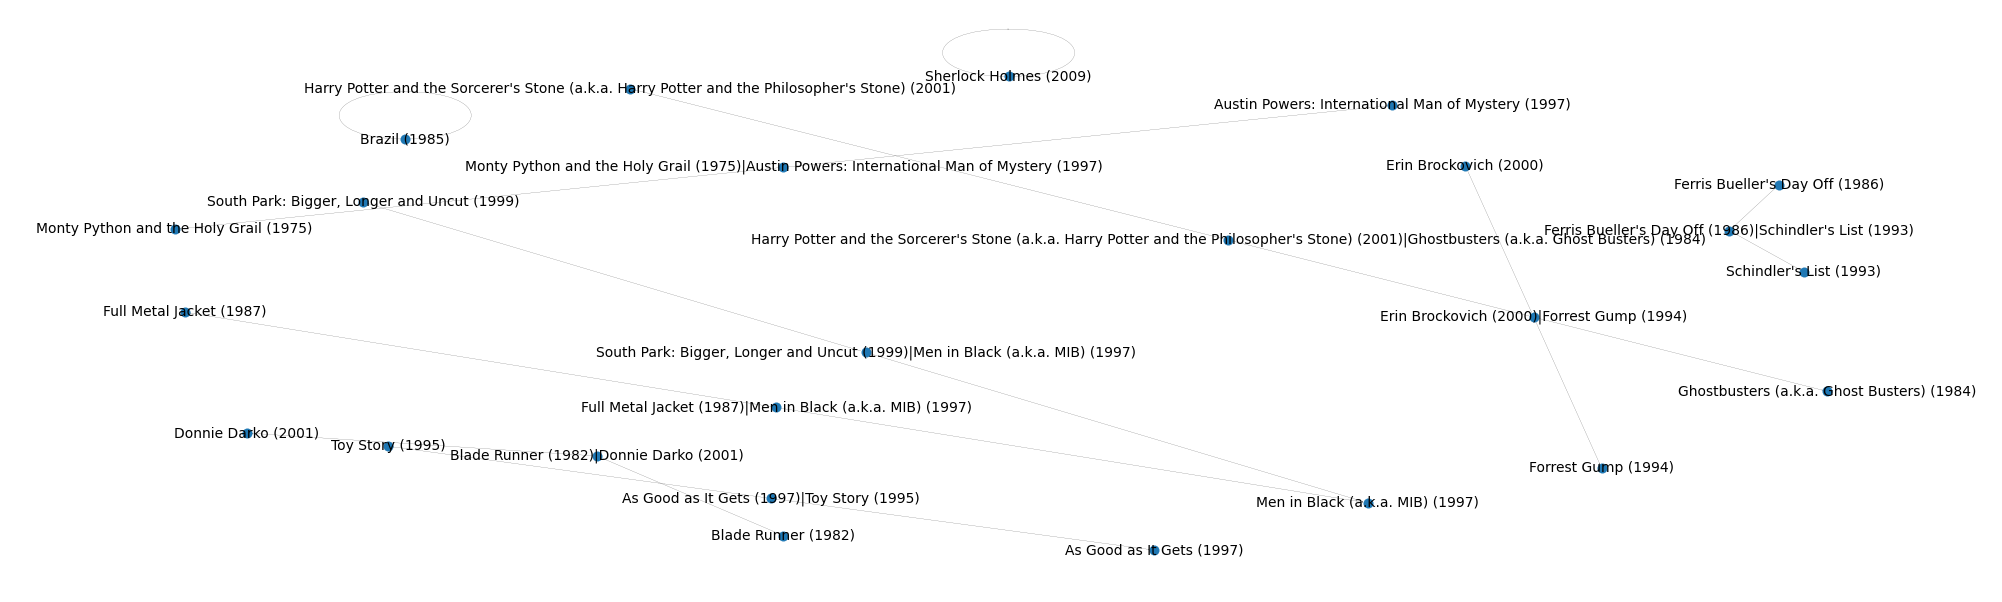

In [17]:
# importing networkx
import networkx as nx
# importing matplotlib.pyplot
import matplotlib.pyplot as plt
 
maximal_2 = fpmax(train, min_support=0.092, use_colnames=True, max_len=2)
some_maximal= maximal_2.sample(n=10)
g = nx.DiGraph()

for index, row in some_maximal.iterrows():
  sr= row['itemsets']
  sub= "|".join(sr)
  for movie in sr:
    g.add_edge(sub, str(movie))

fig = plt.figure(1, figsize=(200, 60), dpi=10)
#nx.draw_networkx_labels(g, pos=nx.spring_layout(g), font_size=100, font_color='k', font_family='sans-serif', font_weight='normal')
nx.draw(g, with_labels = True, node_size=5000, font_size=100)